<a href="https://colab.research.google.com/github/annettembeyu/KNN-Naive_bayes_classifier/blob/main/The_Naive_Bayes_IP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Detection Classifier using  Naive Bayes Model

## 1. Defining the Question

a) Specifying the Data Analytic Question


* To predict whether a particular email is a spam or not.

### b) Defining the Metric for Success

> Prediciting the status of an email whether it is a spam or not with the highest level of precision.

### c) Understanding the context 

For the Naive Bayes model, I will use it to make prediction on a dataset containing attributes that will help in determining whether an email is a spam or not. The following is a descriPtion of the data which can also be found in the [LINK](http://www.ics.uci.edu/~mlearn/MLRepository.html).


SPAM E-MAIL DATABASE ATTRIBUTES:
48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD,
i.e. 100 * (number of times the WORD appears in the e-mail) / 
total number of words in e-mail.  A "word" in this case is any 
string of alphanumeric characters bounded by non-alphanumeric 
characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR
= percentage of characters in the e-mail that match CHAR,
i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), 
i.e. unsolicited commercial e-mail.  



* 1, 0.    | spam, non-spam classes
* word_freq_make:         continuous.
* word_freq_address:      continuous.
* word_freq_all:          continuous.
* word_freq_3d:           continuous.
* word_freq_our:          continuous.
* word_freq_over:         continuous.
* word_freq_remove:       continuous.
* word_freq_internet:     continuous.
* word_freq_order:        continuous.
* word_freq_mail:         continuous.
* word_freq_receive:      continuous.
* word_freq_will:         continuous.
* word_freq_people:       continuous.
* word_freq_report:       continuous.
* word_freq_addresses:    continuous.
* word_freq_free:         continuous.
* word_freq_business:     continuous.
* word_freq_email:        continuous.
* word_freq_you:          continuous.
* word_freq_credit:       continuous.
* word_freq_your:         continuous.
* word_freq_font:         continuous.
* word_freq_000:          continuous.
* word_freq_money:        continuous.
* word_freq_hp:           continuous.
* word_freq_hpl:          continuous.
* word_freq_george:       continuous.
* word_freq_650:          continuous.
* word_freq_lab:          continuous.
* word_freq_labs:         continuous.
* word_freq_telnet:       continuous.
* word_freq_857:          continuous.
* word_freq_data:         continuous.
* word_freq_415:          continuous.
* word_freq_85:           continuous.
* word_freq_technology:   continuous.
* word_freq_1999:         continuous.
* word_freq_parts:        continuous.
* word_freq_pm:           continuous.
* word_freq_direct:       continuous.
* word_freq_cs:           continuous.
* word_freq_meeting:      continuous.
* word_freq_original:     continuous.
* word_freq_project:      continuous.
* word_freq_re:           continuous.
* word_freq_edu:          continuous.
* word_freq_table:        continuous.
* word_freq_conference:   continuous.
* char_freq_;:            continuous.
* char_freq_(:            continuous.
* char_freq_[:            continuous.
* char_freq_!:            continuous.
* char_freq_$:            continuous.
* char_freq_#:            continuous.
* capital_run_length_average: continuous.
* capital_run_length_longest: continuous.
* capital_run_length_total:   continuous.


I will select the most suitable type of Naive Baye Model and approach the model performance as follows:

* Using dataset 2 [LINK](https://archive.ics.uci.edu/ml/datasets/Spambase), perform classification of the testing set samples using the Naive Bayes Classifier.
* I will then compute the accuracy (percentage of correct classification) and report the confusion matrix of each classifier.
* I will then repeat the two steps above, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
* I then give suggestions and application for at least one of the optimization techniques.
* Provide further recommendations to improve the classifier.

### d) Recording the Experimental Design


*   Importing the necessary libraries and checking the data
*   External Data Source Validation
*   Exlporatory Data Analysis
*   Implementing the solution
*   Challenging the solution
*   Follow up questions

### e) Data Relevance

The dataset has the relevant etrics necessary to clasify the email class as being a spam or not.

## 2. Reading the Data

In [3]:
# Importing the library packages

import os
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the dataset

head_list = ['word_freq_make','word_freq_address', 'word_freq_all',
          'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
          'word_freq_internet', 'word_freq_order', 'word_freq_mail', 
          'word_freq_receive', 'word_freq_will', 'word_freq_people', 
          'word_freq_report', 'word_freq_addresses', 'word_freq_free',
          'word_freq_business', 'word_freq_email', 'word_freq_you',
          'word_freq_credit', 'word_freq_your', 'word_freq_font',
          'word_freq_000', 'word_freq_money', 'word_freq_hp', 
          'word_freq_hpl', 'word_freq_george', 'word_freq_650',
          'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
          'word_freq_857', 'word_freq_data', 'word_freq_415',
          'word_freq_85', 'word_freq_technology', 'word_freq_1999',
          'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
          'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
          'word_freq_project', 'word_freq_re', 'word_freq_edu',
          'word_freq_table', 'word_freq_conference', 'char_freq_',
          'char_freq_(', 'char_freq_[', 'char_freq_!',
          'char_freq_$', 'char_freq_#', 'capital_run_length_average',
          'capital_run_length_longest', 'capital_run_length_total','spam_status']

spam = pd.read_csv('spambase.data', names= head_list )
spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_status
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
#
print('Spam shape: {} Rows, {} Columns'.format(*spam.shape))

Spam shape: 4601 Rows, 58 Columns


In [6]:
# Previewing the top of our dataset
#
display("Spam Dataframe")
display(spam.head(5))


'Spam Dataframe'

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_status
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
# Previewing the bottom of our dataset
# 
#
display("Spam Dataframe")
display(spam.tail(5))

'Spam Dataframe'

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_status
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [8]:
# Checking whether each column has an appropriate datatype
#
display("The data types of attributed for the spam Dataset are:")
display(spam.dtypes)

'The data types of attributed for the spam Dataset are:'

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [9]:
# previewing the column heads for the datasets
display("The column heads for the Spam Dataset are:")
display(spam.columns)

'The column heads for the Spam Dataset are:'

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


## 4. External Data Source Validation

Making that data matches something outside of the dataset is of utmost importannce. This ensures that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

 The following is a link to an external reliable resource so as to provide credibility to my dataset: [Link](http://nrvis.com/data/mldata/spambase.csv).

## 5. Tidying the Dataset

In [10]:
# Checking for Anomalies
#
Q1= spam.quantile(0.25)
Q3 =spam.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

word_freq_make                 0.000
word_freq_address              0.000
word_freq_all                  0.000
word_freq_3d                   0.000
word_freq_our                  0.000
word_freq_over                 0.000
word_freq_remove               0.000
word_freq_internet             0.000
word_freq_order                0.000
word_freq_mail                 0.000
word_freq_receive              0.000
word_freq_will                 0.000
word_freq_people               0.000
word_freq_report               0.000
word_freq_addresses            0.000
word_freq_free                 0.000
word_freq_business             0.000
word_freq_email                0.000
word_freq_you                  0.000
word_freq_credit               0.000
word_freq_your                 0.000
word_freq_font                 0.000
word_freq_000                  0.000
word_freq_money                0.000
word_freq_hp                   0.000
word_freq_hpl                  0.000
word_freq_george               0.000
w

'0.75 quartile'

word_freq_make                  0.000
word_freq_address               0.000
word_freq_all                   0.420
word_freq_3d                    0.000
word_freq_our                   0.380
word_freq_over                  0.000
word_freq_remove                0.000
word_freq_internet              0.000
word_freq_order                 0.000
word_freq_mail                  0.160
word_freq_receive               0.000
word_freq_will                  0.800
word_freq_people                0.000
word_freq_report                0.000
word_freq_addresses             0.000
word_freq_free                  0.100
word_freq_business              0.000
word_freq_email                 0.000
word_freq_you                   2.640
word_freq_credit                0.000
word_freq_your                  1.270
word_freq_font                  0.000
word_freq_000                   0.000
word_freq_money                 0.000
word_freq_hp                    0.000
word_freq_hpl                   0.000
word_freq_ge

'0.5 quartile'

word_freq_make                  0.000
word_freq_address               0.000
word_freq_all                   0.420
word_freq_3d                    0.000
word_freq_our                   0.380
word_freq_over                  0.000
word_freq_remove                0.000
word_freq_internet              0.000
word_freq_order                 0.000
word_freq_mail                  0.160
word_freq_receive               0.000
word_freq_will                  0.800
word_freq_people                0.000
word_freq_report                0.000
word_freq_addresses             0.000
word_freq_free                  0.100
word_freq_business              0.000
word_freq_email                 0.000
word_freq_you                   2.640
word_freq_credit                0.000
word_freq_your                  1.270
word_freq_font                  0.000
word_freq_000                   0.000
word_freq_money                 0.000
word_freq_hp                    0.000
word_freq_hpl                   0.000
word_freq_ge

In [11]:
# checking for unique values in the dataset
display("Unique values in Spam dataset:")
display(spam.nunique())

'Unique values in Spam dataset:'

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

In [12]:
# Identifying the Missing Data
display("Missing values in Spam dataset")
display(spam.isnull().sum())

'Missing values in Spam dataset'

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

The spam dataframe does not contain any missing values from the output above.

In [13]:
# confirming missing values in the dataset
display("Columns with missing values in Spam dataset")
display(spam.isna().any())

'Columns with missing values in Spam dataset'

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [14]:
# Checking for duplicates
spam.duplicated().any()

True

From the output above, this is an indication that there are duplicated entries in the data.

In [15]:
# Removing duplicates

spam.drop_duplicates(keep='first', inplace = True)

In [16]:
# Confirming whether the duplicates have been removed
#
spam.duplicated().any()

False

In [17]:
# Determining the no. of records in our dataset
#
spam.shape

(4210, 58)

In [18]:
# Checking the unique values 
#
spam.word_freq_make.unique()

array([0.  , 0.21, 0.06, 0.15, 0.05, 1.17, 0.3 , 0.18, 0.49, 0.46, 0.73,
       0.23, 0.12, 0.66, 0.75, 0.47, 0.59, 1.24, 0.5 , 0.16, 0.41, 1.  ,
       0.36, 0.39, 0.67, 0.42, 0.14, 0.62, 0.52, 0.17, 0.44, 0.34, 0.43,
       2.12, 0.54, 0.53, 0.51, 0.45, 0.22, 0.07, 1.03, 0.26, 0.19, 0.84,
       0.08, 0.48, 0.8 , 0.58, 0.25, 0.4 , 0.1 , 1.63, 0.35, 0.64, 0.63,
       0.65, 0.2 , 0.6 , 0.76, 0.11, 1.05, 0.29, 0.33, 0.27, 0.31, 0.09,
       0.32, 0.57, 0.9 , 0.28, 0.56, 2.43, 1.18, 0.13, 2.32, 0.68, 0.79,
       1.26, 0.89, 0.7 , 0.82, 0.87, 0.24, 0.95, 0.93, 0.98, 1.01, 0.72,
       0.71, 1.23, 2.35, 0.78, 0.38, 0.74, 1.36, 1.47, 0.69, 1.06, 1.61,
       1.04, 0.37, 1.19, 1.44, 0.61, 0.86, 0.77, 0.99, 0.85, 4.54, 0.96,
       0.02, 1.14, 0.81, 1.02, 1.11, 2.77, 0.01, 2.  , 0.04, 0.03, 1.09,
       0.97, 1.16, 2.27, 1.07, 3.94, 1.75, 3.03, 0.83, 0.55, 1.12, 2.85,
       3.84, 1.31, 1.08, 1.49, 4.  , 1.39, 4.34, 1.42, 1.88, 0.88])

## 6. Exploratory Analysis

#### Unimodal Data Visualizations

In [19]:
# looking at the number of spams in the dataset.
spam.spam_status.value_counts()

0    2531
1    1679
Name: spam_status, dtype: int64

There are 1679 spam emails and 2531 non spam emails. This clearly shows how imbalanced the data is.

Text(0, 0.5, 'Spam/NotSpam')

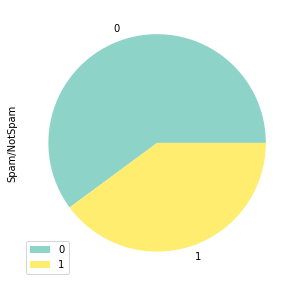

In [20]:
# plotting a visual to show the proportion of spam emails and non spam emails.
plt.figure(figsize=[5,5])
spam["spam_status"].value_counts().plot(kind='pie',legend=True,cmap="Set3")
plt.ylabel("Spam/NotSpam")

In [21]:
# summary statistics grouped by spam status
spam.groupby('spam_status').describe()

word_freq_make                      ... capital_run_length_total                
                     count      mean       std  ...                      50%    75%      max
spam_status                                     ...                                         
0                   2531.0  0.072801  0.287200  ...                     63.0  153.0   5902.0
1                   1679.0  0.151948  0.312451  ...                    191.0  513.0  15841.0

[2 rows x 456 columns]

In [22]:
# Descriptive summaries for the dataset
print('Variance of values in different columns')
print(spam.var())
print('Skewness of values in different columns')
print(spam.skew())
print('Kurtosis of values in different columns')
print(spam.kurt())
print('Summary')
spam.describe()

Variance of values in different columns
word_freq_make                     0.090003
word_freq_address                  0.206352
word_freq_all                      0.265966
word_freq_3d                       1.829221
word_freq_our                      0.473076
word_freq_over                     0.076193
word_freq_remove                   0.157834
word_freq_internet                 0.168332
word_freq_order                    0.079605
word_freq_mail                     0.431174
word_freq_receive                  0.033917
word_freq_will                     0.778829
word_freq_people                   0.095672
word_freq_report                   0.119761
word_freq_addresses                0.058654
word_freq_free                     0.636061
word_freq_business                 0.209461
word_freq_email                    0.292825
word_freq_you                      3.128512
word_freq_credit                   0.255614
word_freq_your                     1.321010
word_freq_font                     1

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_status
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [23]:
#get the correlation of each feature with the target variable
corr = pd.DataFrame(spam.corr()['spam_status'])
#get the absolute value of the correlation
corr['abs'] = np.abs(corr['spam_status'])
#sorting the values by their absolute value, in descending order
corr = corr.sort_values(by='abs',ascending=False)
corr
#

,spam_status,abs
spam_status,1.000000,1.000000
word_freq_your,0.394392,0.394392
word_freq_remove,0.334456,0.334456
char_freq_$,0.326603,0.326603
word_freq_000,0.325716,0.325716
word_freq_free,0.279261,0.279261
word_freq_receive,0.272451,0.272451
word_freq_hp,-0.270024,0.270024
word_freq_business,0.260773,0.260773
word_freq_you,0.256242,0.256242


### Feature selection

In [24]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset

y = spam['spam_status'].values

test_features= spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
X= test_features.values
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=False, Rank: 2
Column: 5, Selected=False, Rank: 6
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3


Picking the most important features from the output above, the features to be considered would be those that have a rank equivalent to 1. These features are:

* word_freq_all
* word_freq_3d
* word_freq_our
* word_freq_remove
* word_freq_order

## Impementing the solution

Performing the multinomial naive bayes since the data contains attributes which are continuos.

In [25]:
# Training the Model by splitting it using the 80-20 ratio
# Now that we have performed feature extraction from our data, it is time to build our model. 
# We will start by splitting our data into training and test sets


y = spam['spam_status']

X= spam[['word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_remove', 'word_freq_order']]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify= spam['spam_status'])
# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(predicted)
print(y_test)
print(np.mean(predicted == y_test))

# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 

The level accuracy attained is 0.70 which is an indication that in classifying whether an email is a spam or not it will be done with 70% of precision.

In [26]:
# Training the Model by splitting it using the 70-30 ratio
# Now that we have performed feature extraction from our data, it is time to build our model. 
# We will start by splitting our data into training and test sets


y = spam['spam_status']

X= spam[['word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_remove', 'word_freq_order']]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69, stratify= spam['spam_status'])
# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(predicted)
print(y_test)
print(np.mean(predicted == y_test))

# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))


[0 0 0 ... 0 0 1]
3789    0
4223    0
4029    0
3994    0
4589    0
       ..
354     1
714     1
4510    0
2748    0
966     1
Name: spam_status, Length: 1263, dtype: int64
0.6888361045130641
[[740  19]
 [374 130]]
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       759
           1       0.87      0.26      0.40       504

    accuracy                           0.69      1263
   macro avg       0.77      0.62      0.59      1263
weighted avg       0.75      0.69      0.63      1263



The level accuracy attained is 0.69 which is an indication that in classifying whether an email is a spam or not it will be done with 69% of precision.

In [27]:
# Training the Model by splitting it using the 60-40 ratio
# Now that we have performed feature extraction from our data, it is time to build our model. 
# We will start by splitting our data into training and test sets


y = spam['spam_status']

X= spam[['word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_remove', 'word_freq_order']]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69, stratify= spam['spam_status'])
# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(predicted)
print(y_test)
print(np.mean(predicted == y_test))

# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))


[0 0 1 ... 0 0 0]
942     1
4200    0
1099    1
2261    0
4391    0
       ..
426     1
2357    0
2559    0
402     1
1478    1
Name: spam_status, Length: 1684, dtype: int64
0.6882422802850356
[[987  25]
 [500 172]]
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      1012
           1       0.87      0.26      0.40       672

    accuracy                           0.69      1684
   macro avg       0.77      0.62      0.59      1684
weighted avg       0.75      0.69      0.63      1684



With the splitting of the data using the 60-40 ration an accuracy of 69% is obtained. This is not good enough and the model performance can be enhanced through hyperparamter tuning.

An accuracy of 69% is also obtained just like the other fraction splits made on the data. 